In [35]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import numpy as np
import seaborn as sb

In [36]:
privacy = load_data('privacy')
privacy

[data] https://data.hossam.kr/data/lab09/privacy.xlsx
[desc] 제주도 남녀 대학생의 개인정보 관리방법에 관한 설문조사 결과 데이터 (출처: 사회조사분석사 2급 실기작업형 기출)
[!] Cannot read metadata


,학생ID,성별,메모종류
0,1,남,3
1,2,여,2
2,3,여,2
3,4,여,1
4,5,여,2
5,6,여,3
6,7,남,2
7,8,여,2
8,9,여,1
9,10,남,1


In [37]:
# 선택 범위 리스트로
ratio = privacy.groupby(['성별','메모종류']).size().groupby(level=0).apply(lambda x: x/x.sum()) 
ratio

성별  성별  메모종류
남   남   1       0.250000
        2       0.500000
        3       0.250000
여   여   1       0.181818
        2       0.727273
        3       0.090909
dtype: float64

In [38]:
# 데이터프레임 형태로 정리(피벗테이블 형태)
ratio_df = privacy.pivot_table(index='성별', columns='메모종류',aggfunc='size',fill_value=0)

ratio_df = ratio_df.div(ratio_df.sum(axis=1), axis=0)

ratio_df

메모종류,1,2,3
성별,,,
남,0.250000,0.500000,0.250000
여,0.181818,0.727273,0.090909


In [39]:
my_dpi = 120
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False


<function matplotlib.pyplot.show(close=None, block=None)>

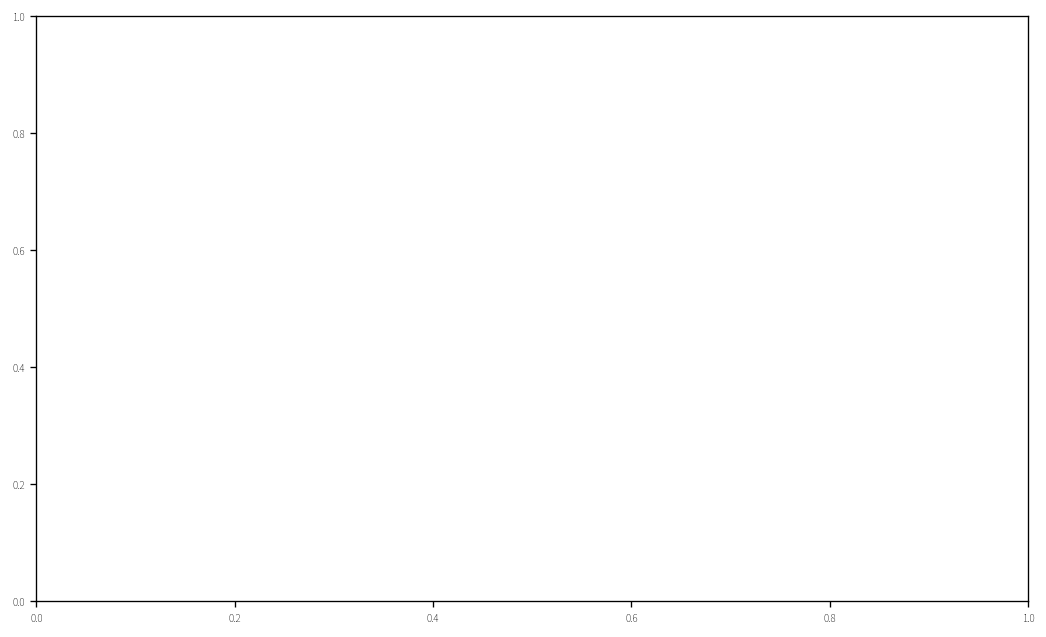

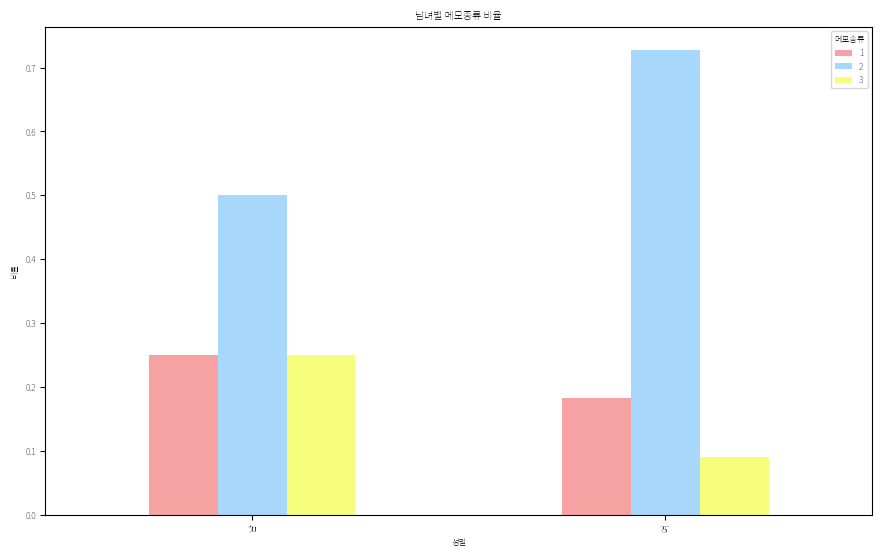

In [42]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)


ratio_df.plot(kind='bar', figsize = (width_px /my_dpi, height_px/my_dpi),color=["#F6A2A2","#A7D7FA","#F6FC7B"])

plt.title('남녀별 메모종류 비율')
plt.ylabel('비율')
plt.xlabel('성별')
plt.legend(title='메모종류')
plt.show

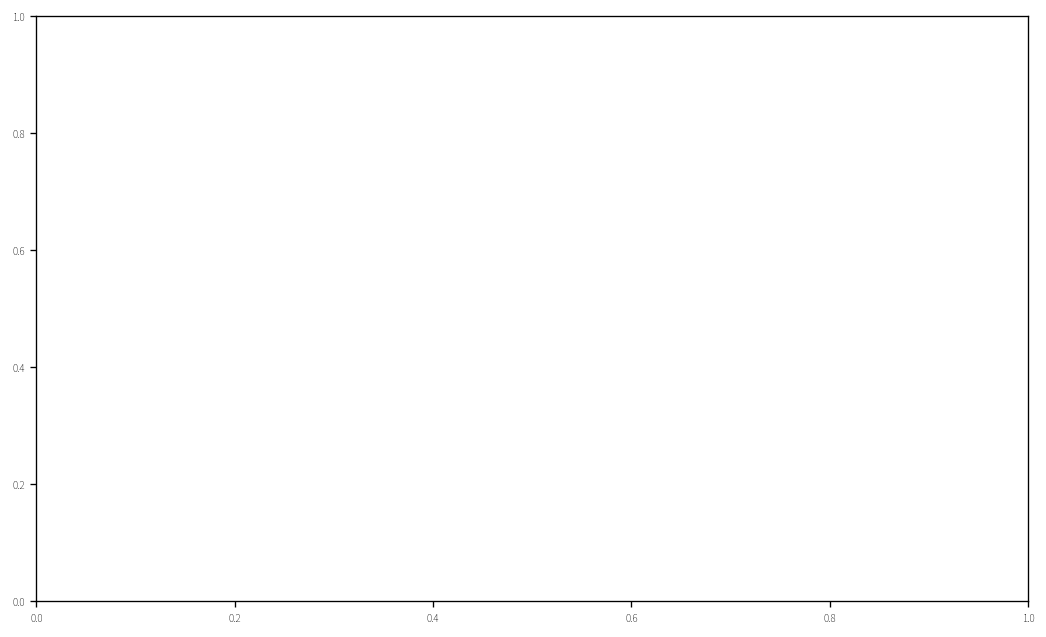

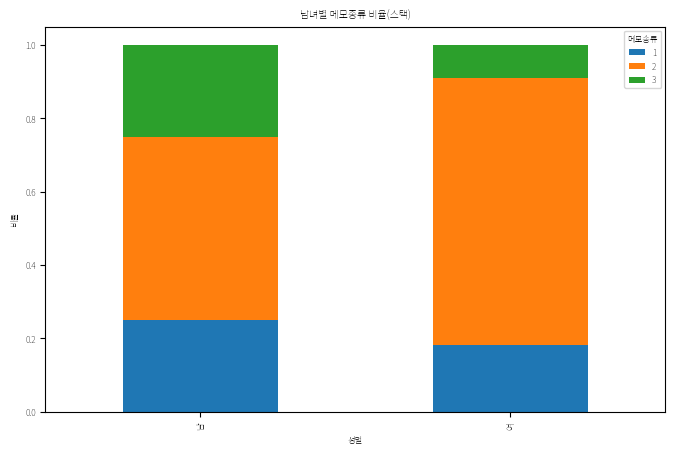

In [28]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

ratio_df.plot(kind='bar', stacked=True,figsize=(8,5))

plt.title('남녀별 메모종류 비율(스택)')
plt.ylabel('비율')
plt.xlabel('성별')
plt.legend(title='메모종류')
plt.show()